# Zhou Guanyu
<img src="https://www.formula1.com/content/fom-website/en/drivers/guanyu-zhou/_jcr_content/image.img.1920.medium.jpg/1646818979975.jpg" width="300">

### Team: Alfa Romeo
<img src ="https://www.formula1.com/content/fom-website/en/drivers/guanyu-zhou/_jcr_content/helmet.img.png/1646825005506.png" width="200">


In [27]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

In [28]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [29]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

zho_laps <- lap_data %>%
            filter(driverId == 855)

# Filtering Lap Data for ALFA ROMEO
romeo_lap <- lap_data %>%
             filter(driverId %in% c(8, 841, 9))

# Season Analysis

In [30]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1011,169
20,114
38,114
4,113
1045,112
1052,111
53,57
73,57
863,57


`geom_smooth()` using formula 'y ~ x'



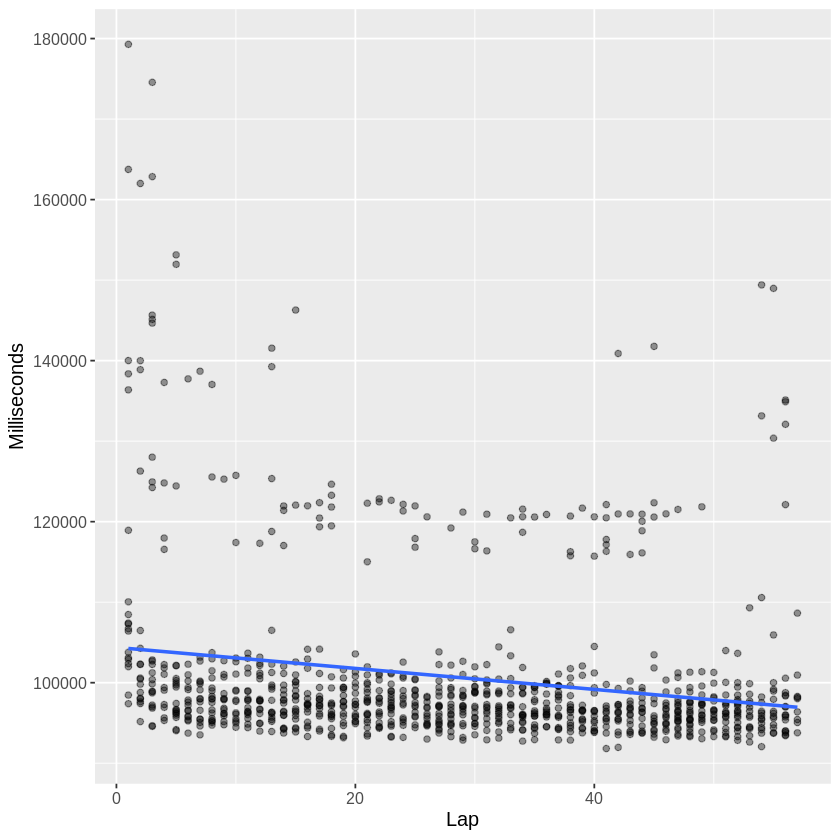

In [31]:
#1. Bahrain 

zg_bahrain <- romeo_lap %>%
                filter(raceId %in% bahrain_race_ID) 

zg_bahrain_clean <- zg_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
zg_bahrain_clean
zg_bahrain_clean_ID <- zg_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_bahrain_races <- romeo_lap %>%
                    filter(raceId %in% zg_bahrain_clean_ID)

formulaone_split <- initial_split(zg_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 1

initiate_rmse() 

## GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1042,130
1054,66


`geom_smooth()` using formula 'y ~ x'



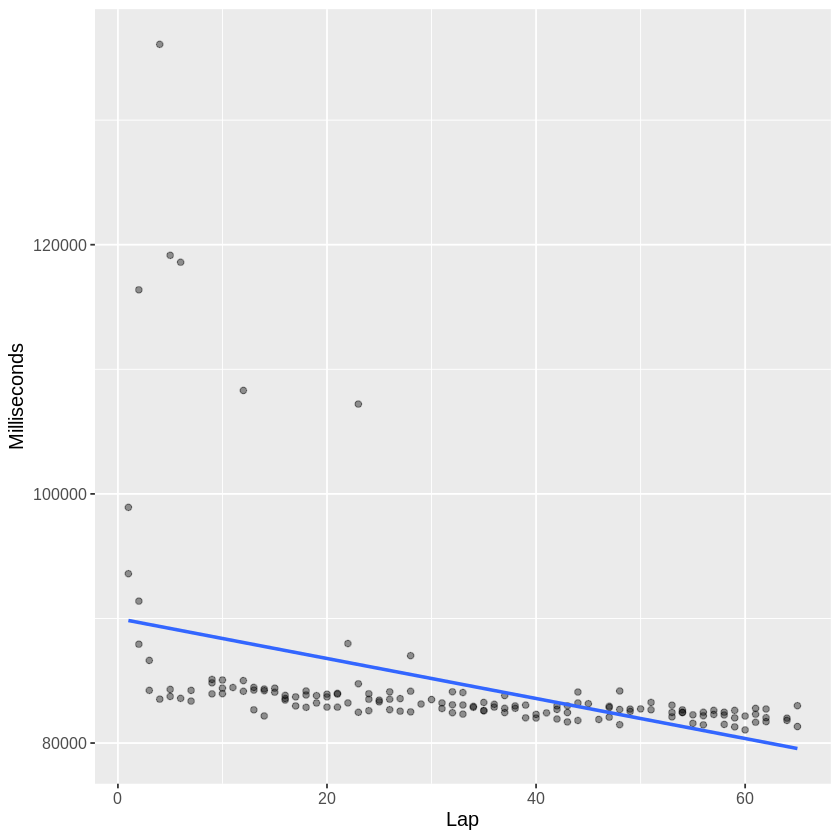

In [32]:
#2. Portimão

zg_Portimão <- romeo_lap %>%
                filter(raceId %in% Portimão_race_ID) 

zg_Portimão_clean <- zg_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_Portimão_clean
zg_Portimão_clean_ID <- zg_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_Portimão_races <- romeo_lap %>%
                    filter(raceId %in% zg_Portimão_clean_ID) 

formulaone_split <- initial_split(zg_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1010,169
969,112
1,110
18,100
36,94
108,58
124,58
141,58
338,58


`geom_smooth()` using formula 'y ~ x'



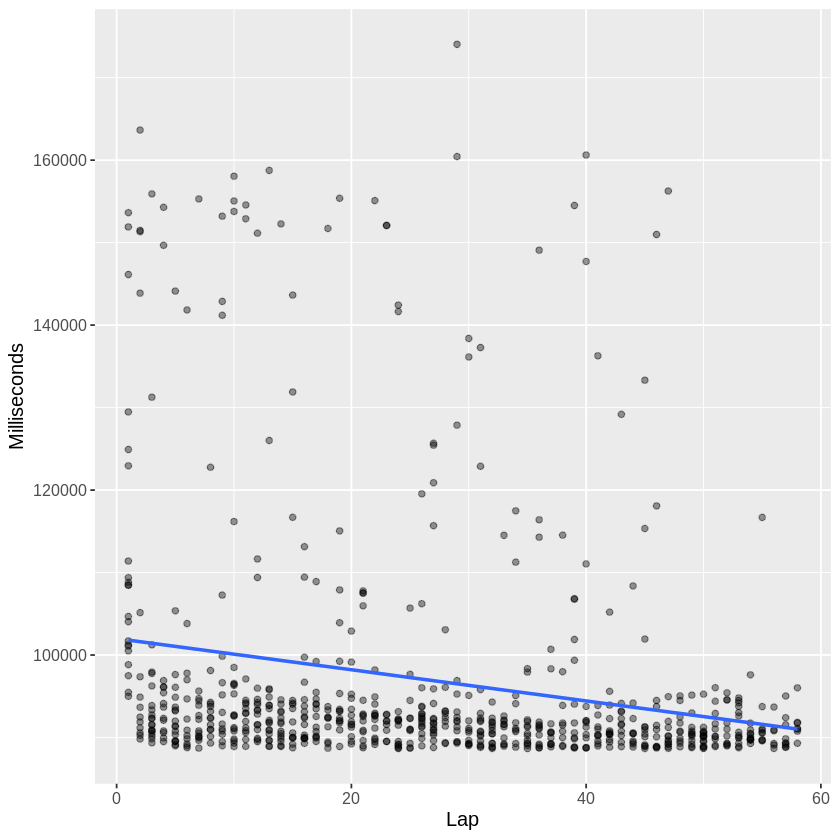

In [33]:
#3. Australia

zg_aus <- romeo_lap %>%
                filter(raceId %in% aus_race_ID) 

zg_aus_clean <- zg_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_aus_clean
zg_aus_clean_ID <- zg_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_aus_races <- romeo_lap %>%
                    filter(raceId %in% zg_aus_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 3

initiate_rmse() 

## GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1043,126
1053,125
56,62
111,62
93,61
127,44
144,17
74,9


`geom_smooth()` using formula 'y ~ x'



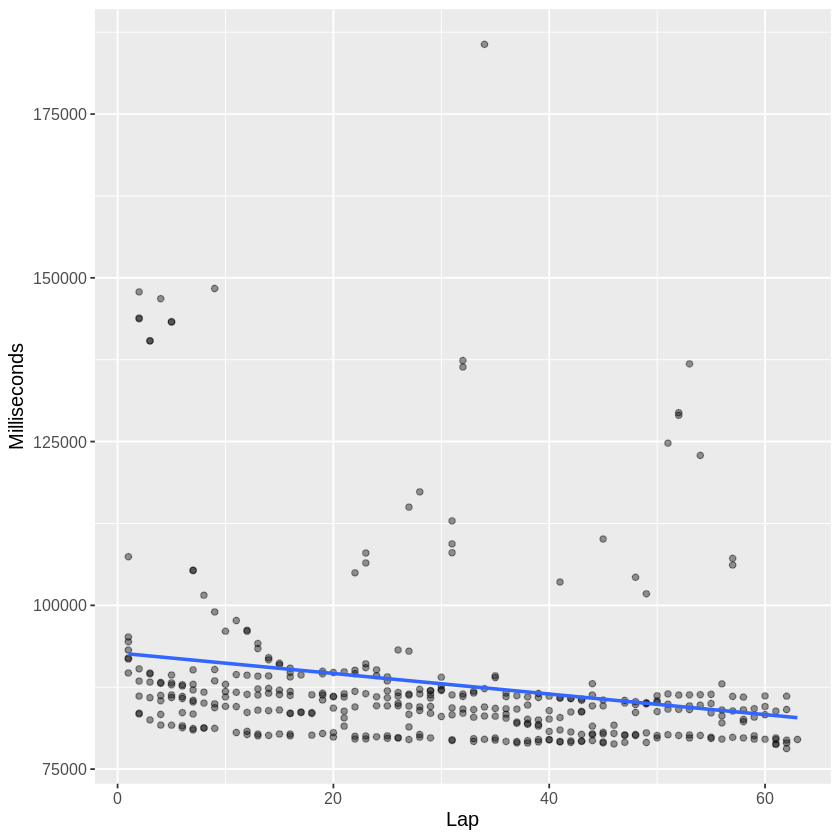

In [34]:
#4. Italy, Imola

zg_imola <- romeo_lap %>%
                filter(raceId %in% imola_race_ID) 

zg_imola_clean <- zg_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_imola_clean
zg_imola_clean_ID <- zg_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_imola_races <- romeo_lap %>%
                    filter(raceId %in% zg_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(zg_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

## GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
7,116
22,116
47,116
1067,114
1044,68
66,58
84,58
343,58


`geom_smooth()` using formula 'y ~ x'



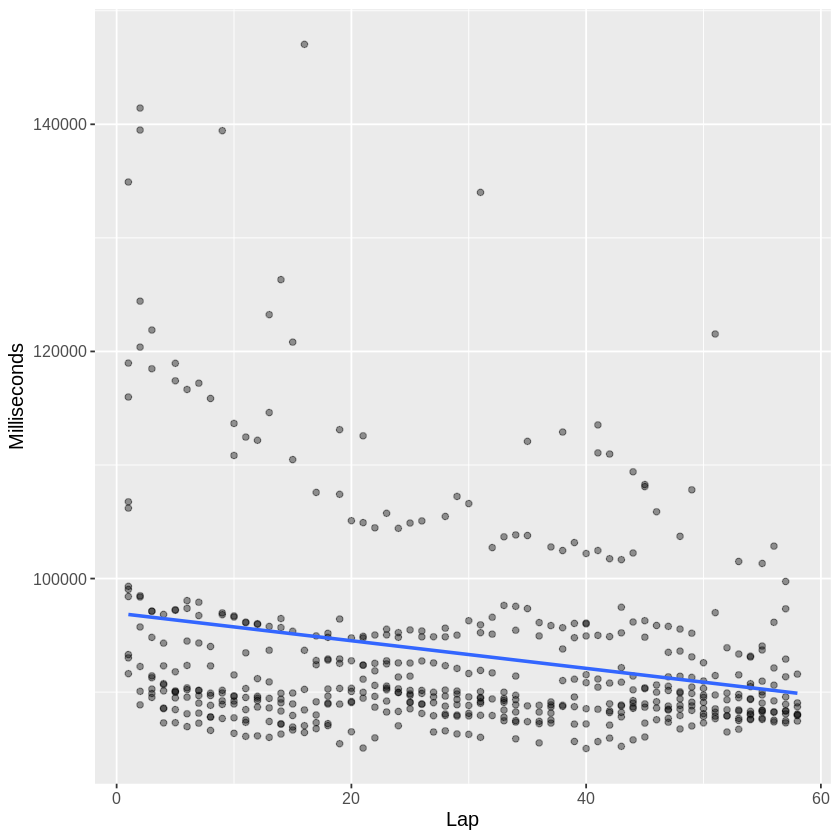

In [35]:
#5. Turkey (Replacing Miami)

zg_turkey <- romeo_lap %>%
                filter(raceId %in% turkey_race_ID) 

# test <- zg_turkey %>%
#         group_by(raceId, driverId) %>%
#         summarize(n = n())

zg_turkey_clean <- zg_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_turkey_clean
zg_turkey_clean_ID <- zg_turkey_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_turkey_races <- romeo_lap %>%
                    filter(raceId %in% zg_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION AND EVALUATION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1014,197
21,132
1036,130
1055,130
5,82
39,74
58,66
75,66
341,66


`geom_smooth()` using formula 'y ~ x'



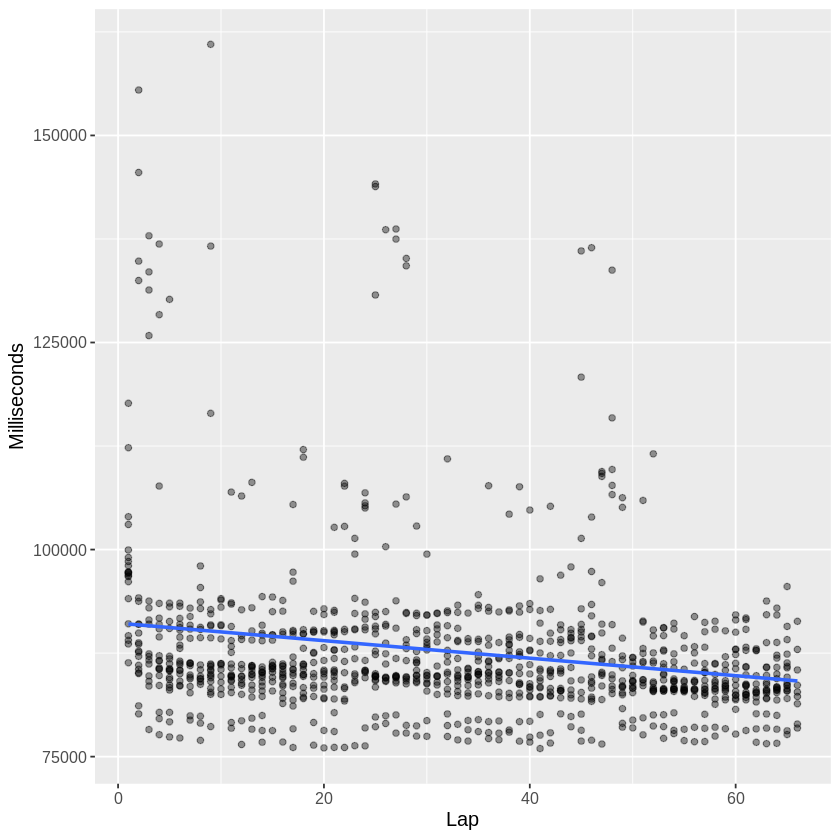

In [36]:
#6. Spain

zg_spain <- romeo_lap %>%
                filter(raceId %in% spain_race_ID) 

zg_spain_clean <- zg_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_spain_clean
zg_spain_clean_ID <- zg_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_spain_races <- romeo_lap %>%
                    filter(raceId %in% zg_spain_clean_ID)

formulaone_split <- initial_split(zg_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

## GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1015,230
40,154
1056,154
23,152
6,106
76,78
114,78
342,78
865,78


`geom_smooth()` using formula 'y ~ x'



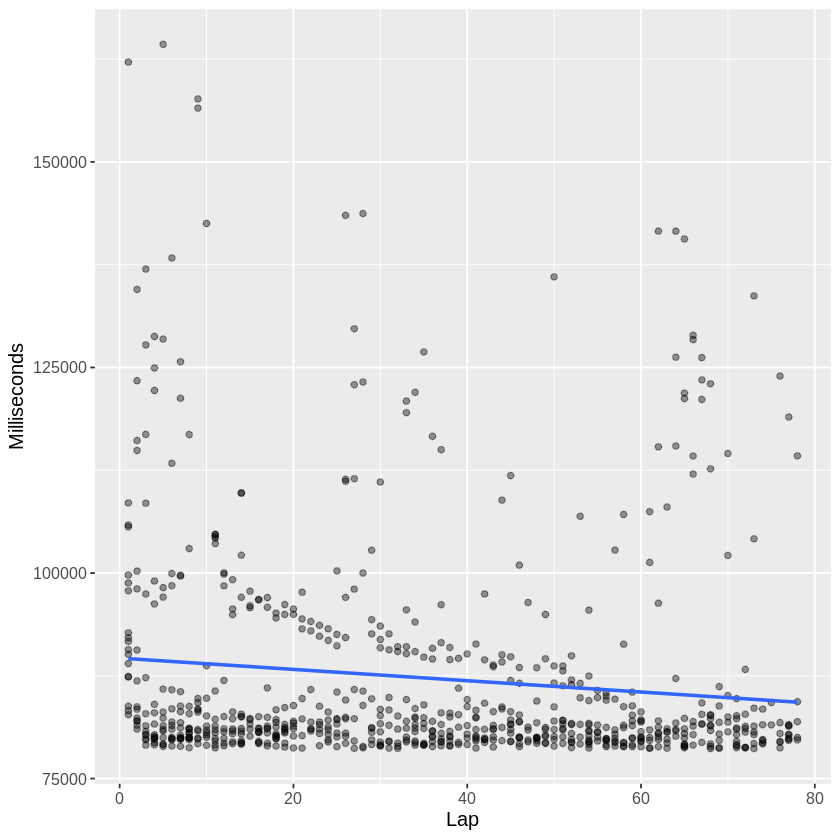

In [37]:
#7. Monaco

zg_monaco <- romeo_lap %>%
                filter(raceId %in% monaco_race_ID) 

zg_monaco_clean <- zg_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_monaco_clean
zg_monaco_clean_ID <- zg_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_monaco_races <- romeo_lap %>%
                    filter(raceId %in% zg_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(zg_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

## GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1013,149
1057,102
955,51
992,51
976,46


`geom_smooth()` using formula 'y ~ x'



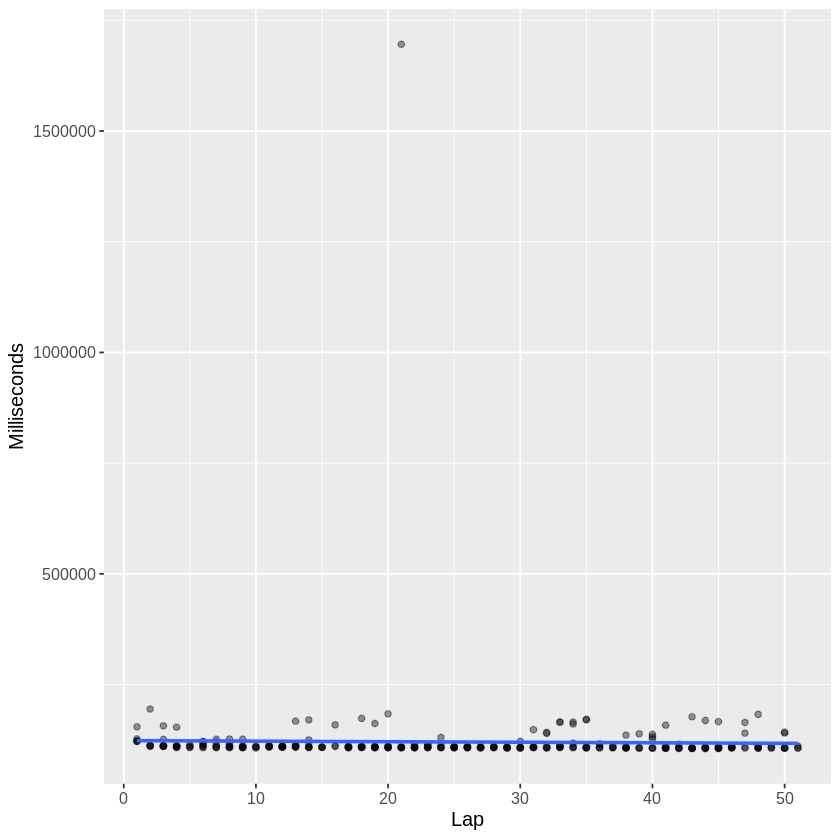

In [38]:
#8. Azerbaijan

zg_azerbaijan <- romeo_lap %>%
                filter(raceId %in% azerbaijan_race_ID) 

zg_azerbaijan_clean <- zg_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_azerbaijan_clean
zg_azerbaijan_clean_ID <- zg_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_azerbaijan_races <- romeo_lap %>%
                    filter(raceId %in% zg_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(zg_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

## GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1016,205
41,96
24,89
61,70
78,70
115,70
131,70
344,70
866,70


`geom_smooth()` using formula 'y ~ x'



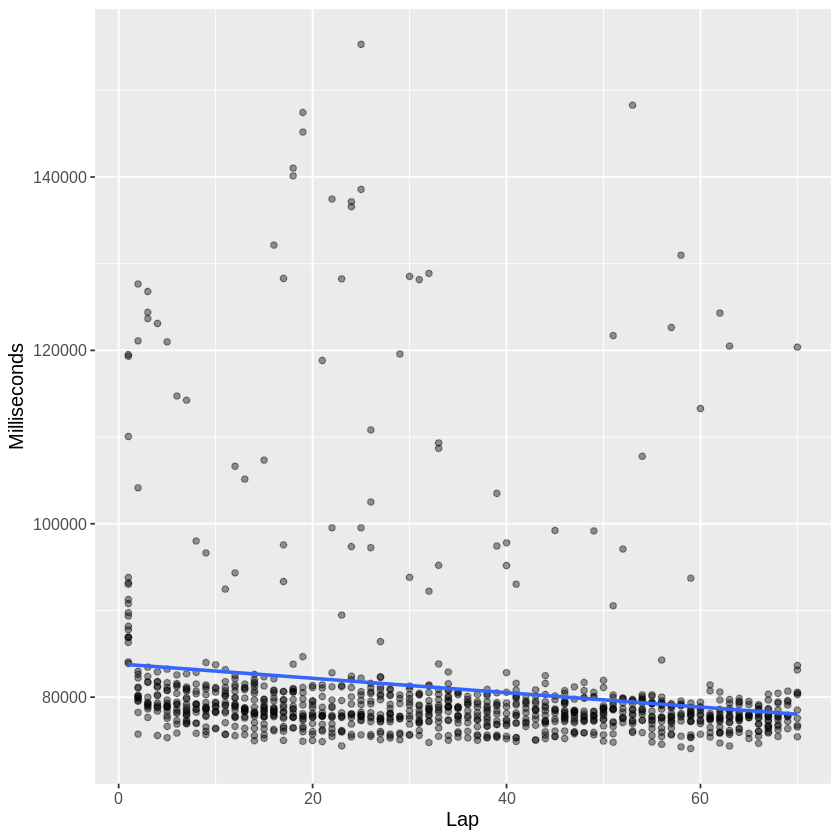

In [39]:
#9. Canada

zg_canada <- romeo_lap %>%
                filter(raceId %in% canada_race_ID) 

zg_canada_clean <- zg_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_canada_clean
zg_canada_clean_ID <- zg_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_canada_races <- romeo_lap %>%
                    filter(raceId %in% zg_canada_clean_ID)

formulaone_split <- initial_split(zg_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

## GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1019,121
8,119
44,118
1034,103
1035,102
1061,102
26,98
60,60
81,60


`geom_smooth()` using formula 'y ~ x'



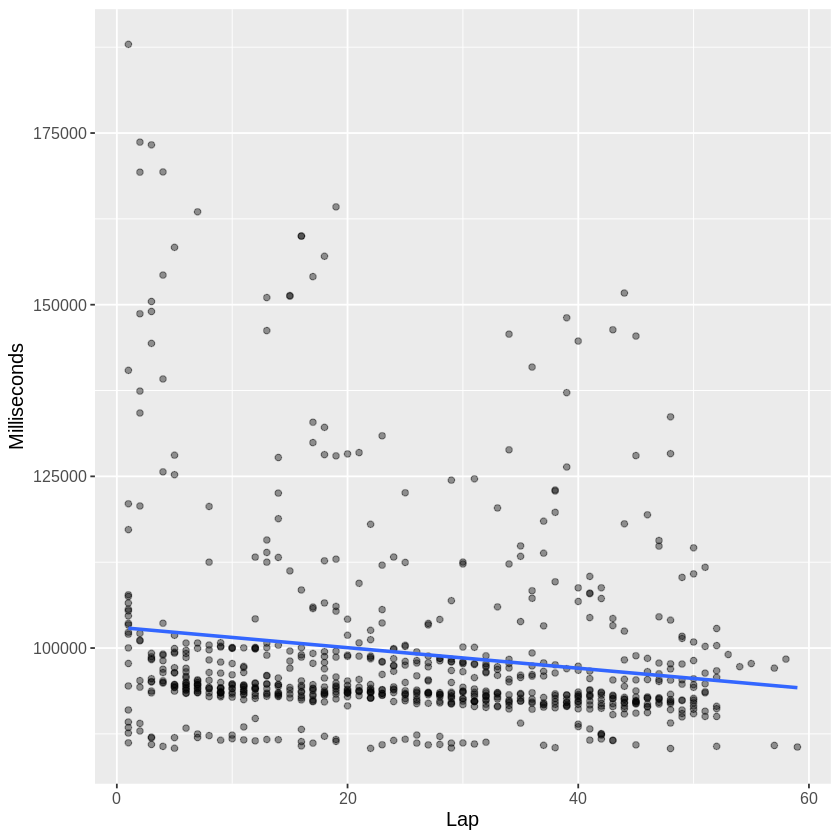

In [40]:
#10. Great Britain

zg_uk <- romeo_lap %>%
                filter(raceId %in% uk_race_ID) 

zg_uk_clean <- zg_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_uk_clean
zg_uk_clean_ID <- zg_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_uk_races <- romeo_lap %>%
                    filter(raceId %in% zg_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(zg_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

## GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



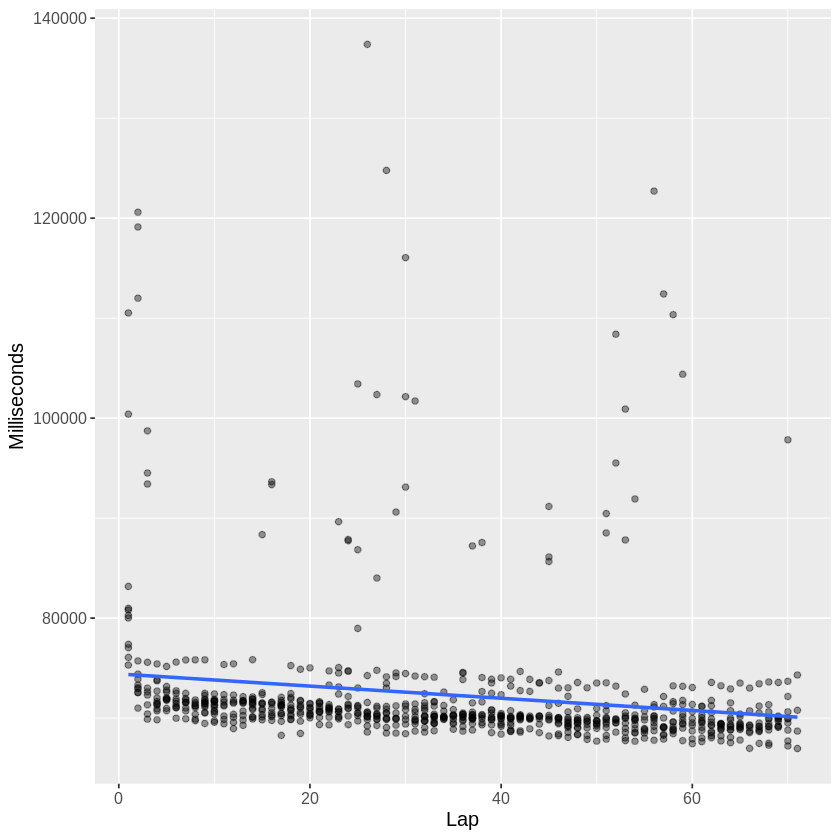

In [41]:
#11. Austria

zg_austria <- romeo_lap %>%
                filter(raceId %in% austria_race_ID) 

zg_austria_clean <- zg_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

zg_austria_clean_ID <- zg_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_austria_races <- romeo_lap %>%
                    filter(raceId %in% zg_austria_clean_ID)

formulaone_split <- initial_split(zg_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

## GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1017,155
1059,104
996,53


`geom_smooth()` using formula 'y ~ x'



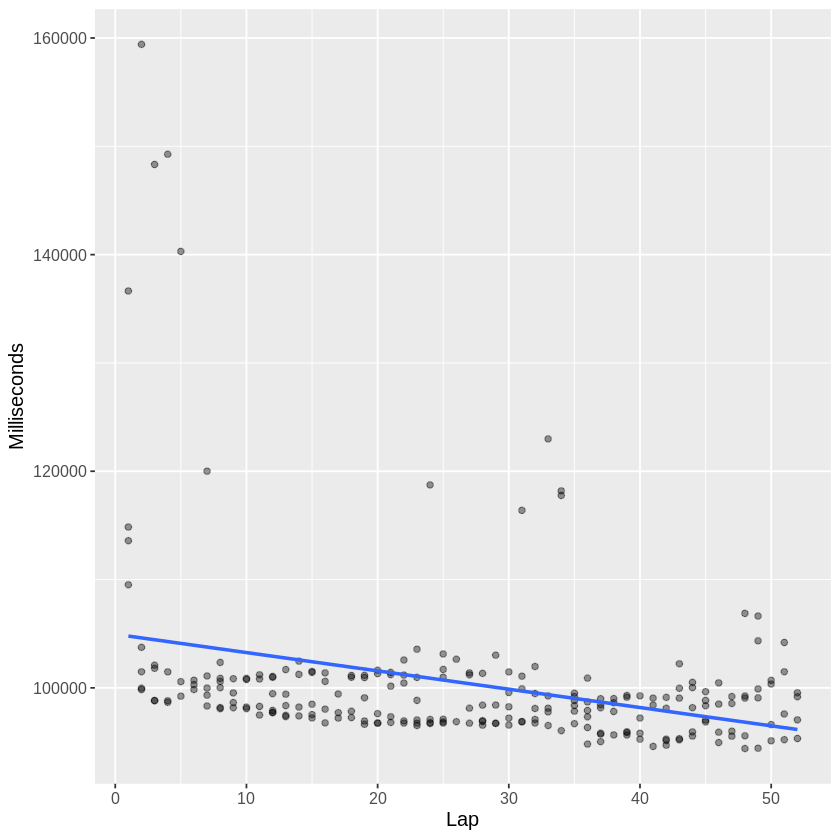

In [42]:
#12. France

zg_france <- romeo_lap %>%
                filter(raceId %in% france_race_ID) 

zg_france_clean <- zg_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_france_clean
zg_france_clean_ID <- zg_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_france_races <- romeo_lap %>%
                    filter(raceId %in% zg_france_clean_ID)

formulaone_split <- initial_split(zg_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

## GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1021,204
10,140
28,140
46,140
1033,138
1062,138
65,94
136,77
153,76


`geom_smooth()` using formula 'y ~ x'



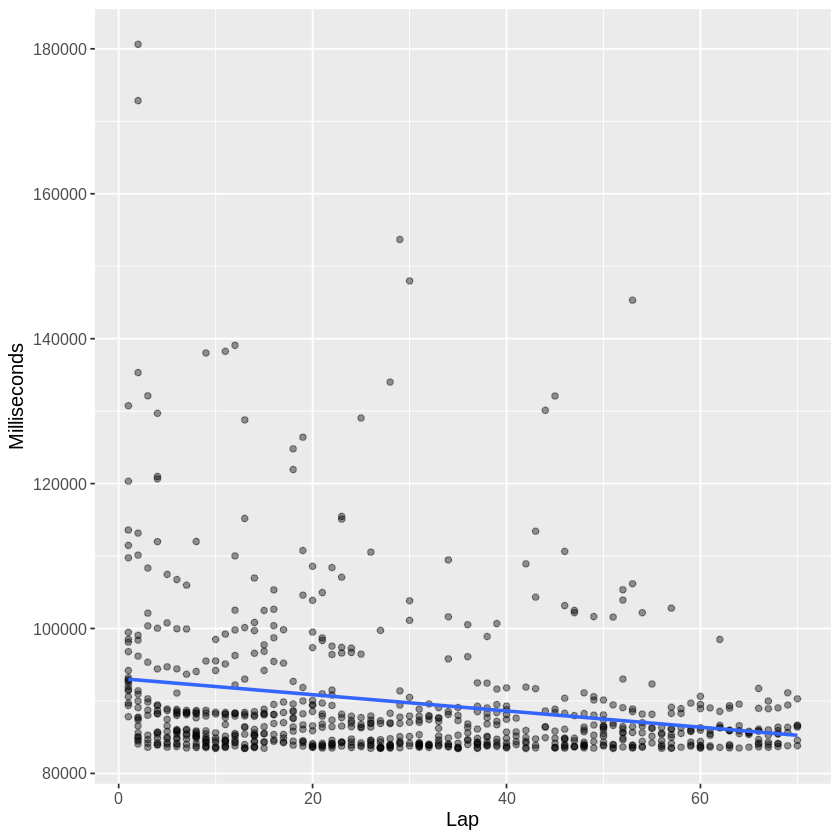

In [43]:
#13. Hungary

zg_hungary <- romeo_lap %>%
                filter(raceId %in% hungary_race_ID) 

zg_hungary_clean <- zg_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
zg_hungary_clean
zg_hungary_clean_ID <- zg_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_hungary_races <- romeo_lap %>%
                    filter(raceId %in% zg_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(zg_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

## GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1022,128
12,88
49,88
30,86
1037,53
86,44
103,44
349,44
871,44


`geom_smooth()` using formula 'y ~ x'



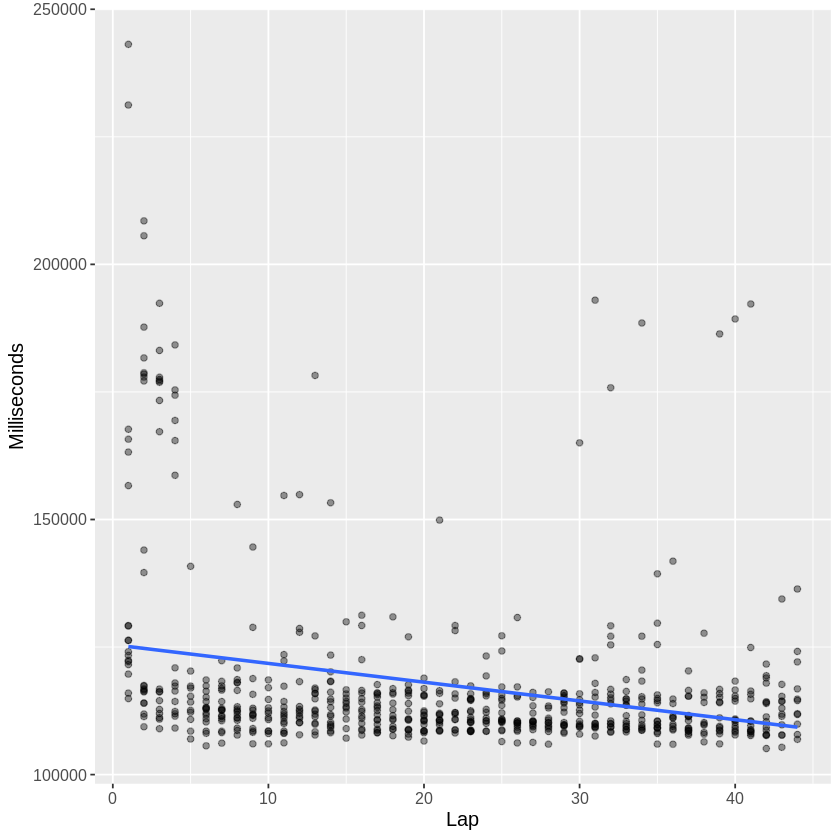

In [44]:
#14. Belgium

zg_belgium <- romeo_lap %>%
                filter(raceId %in% belgium_race_ID) 

zg_belgium_clean <- zg_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_belgium_clean
zg_belgium_clean_ID <- zg_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_belgium_races <- romeo_lap %>%
                    filter(raceId %in% zg_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(zg_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

## GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,140


`geom_smooth()` using formula 'y ~ x'



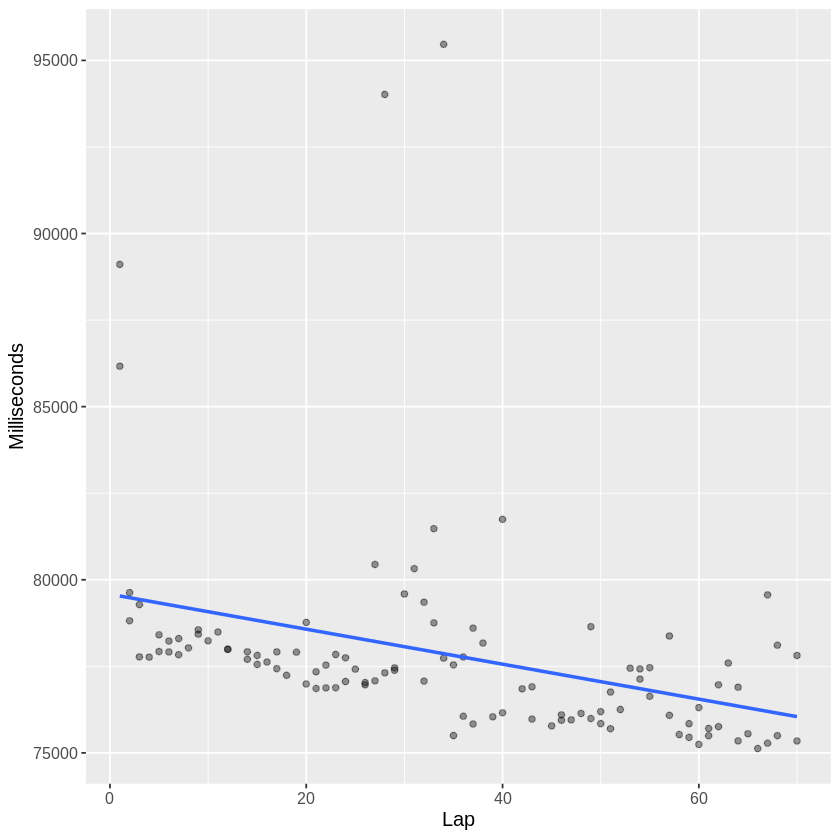

In [45]:
#15. Netherlands

zg_netherlands <- romeo_lap %>%
                filter(raceId %in% netherlands_race_ID) 

zg_netherlands_clean <- zg_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_netherlands_clean
zg_netherlands_clean_ID <- zg_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_netherlands_races <- romeo_lap %>%
                    filter(raceId %in% zg_netherlands_clean_ID)

formulaone_split <- initial_split(zg_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

## GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1023,155
31,106
48,106
67,106
1038,106
1065,106
13,68
85,53
121,53


`geom_smooth()` using formula 'y ~ x'



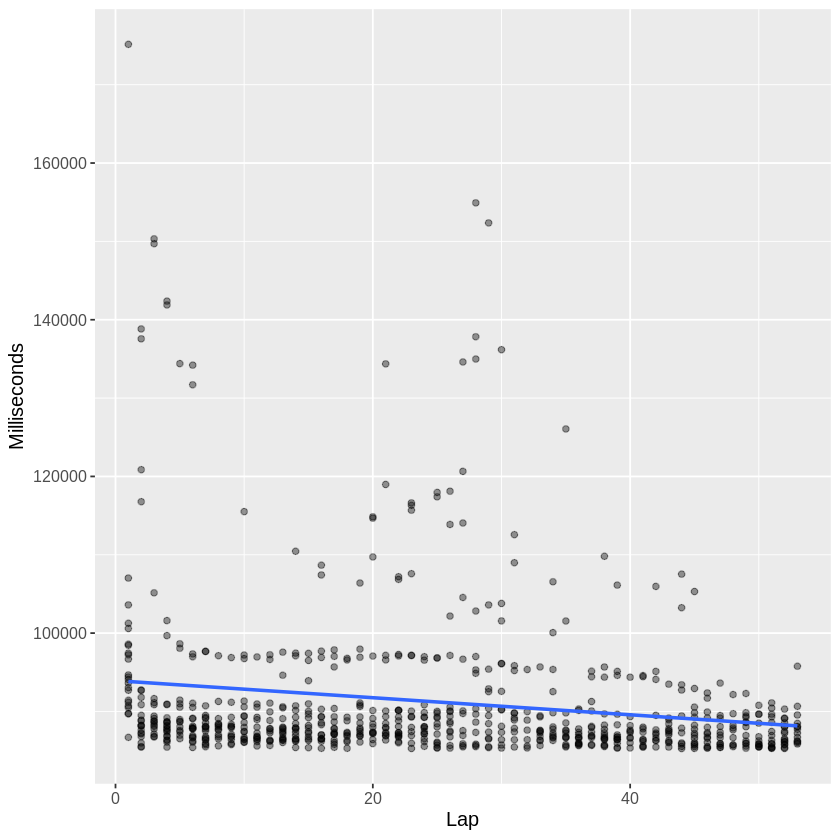

In [46]:
#16. Italy, Monza

zg_monza <- romeo_lap %>%
                filter(raceId %in% monza_race_ID) 

zg_monza_clean <- zg_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
zg_monza_clean
zg_monza_clean_ID <- zg_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_monza_races <- romeo_lap %>%
                    filter(raceId %in% zg_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(zg_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

## GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1024,171
14,122
32,118
351,61
893,61
939,61
962,61
1003,61
913,60


`geom_smooth()` using formula 'y ~ x'



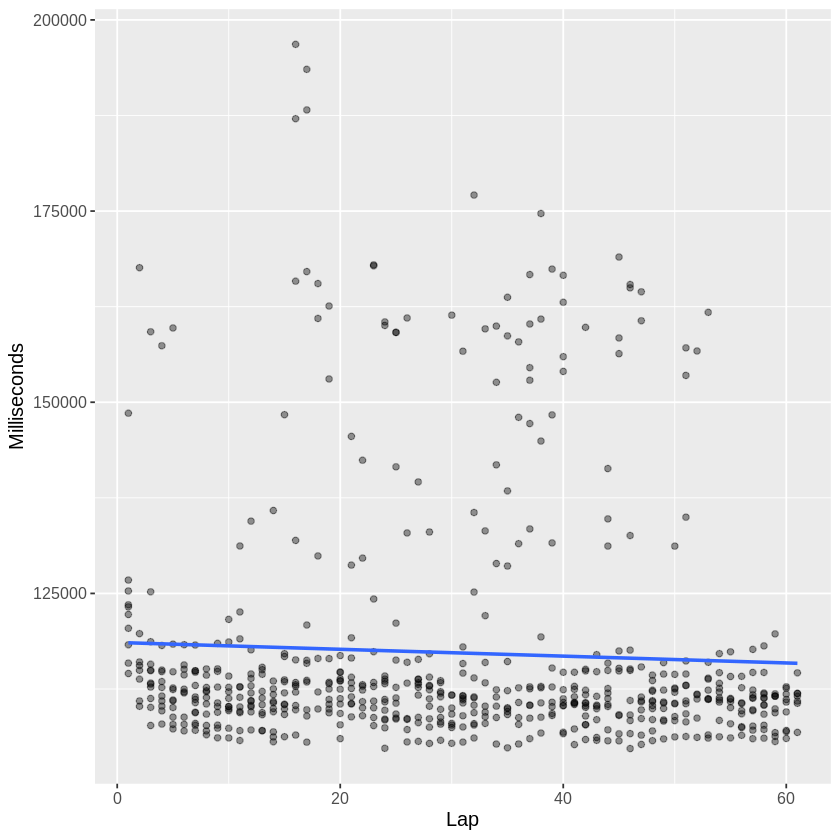

In [47]:
#17. Singapore

zg_singapore <- romeo_lap %>%
                filter(raceId %in% singapore_race_ID) 

zg_singapore_clean <- zg_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_singapore_clean
zg_singapore_clean_ID <- zg_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_singapore_races <- romeo_lap %>%
                    filter(raceId %in% zg_singapore_clean_ID)

formulaone_split <- initial_split(zg_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

## GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1026,152
15,106
69,106
88,53
106,53
123,53
140,53
874,53
895,53


`geom_smooth()` using formula 'y ~ x'



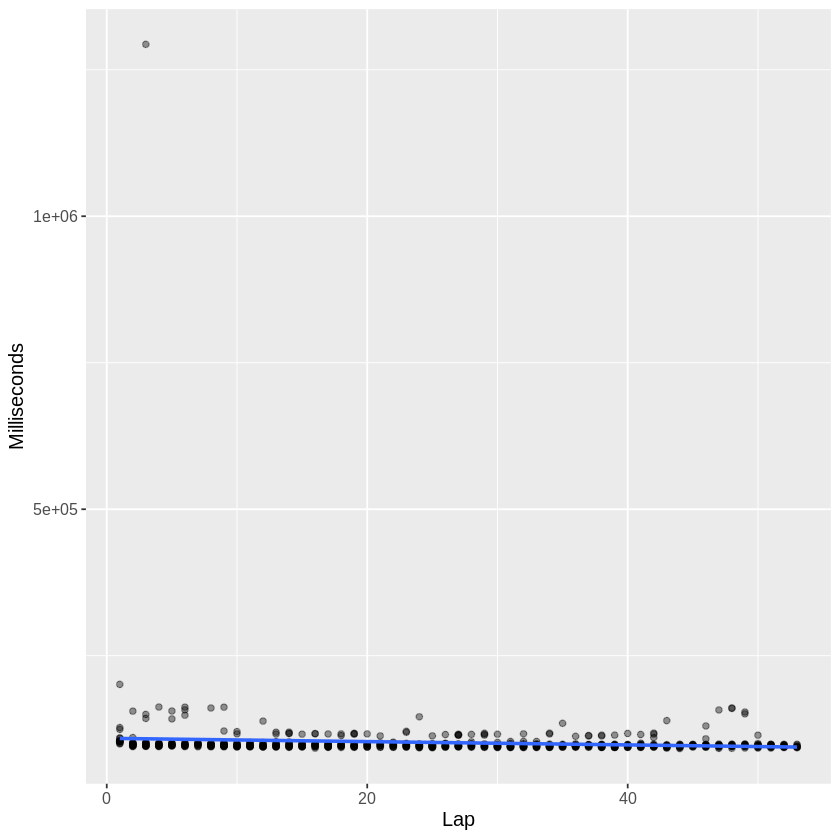

In [48]:
#18. Japan

zg_japan <- romeo_lap %>%
                filter(raceId %in% japan_race_ID) 

zg_japan_clean <- zg_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_japan_clean
zg_japan_clean_ID <- zg_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_japan_races <- romeo_lap %>%
                    filter(raceId %in% zg_japan_clean_ID)

formulaone_split <- initial_split(zg_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

## GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1028,141
1069,110
878,56
985,56
1006,56
916,55
965,38
942,25


`geom_smooth()` using formula 'y ~ x'



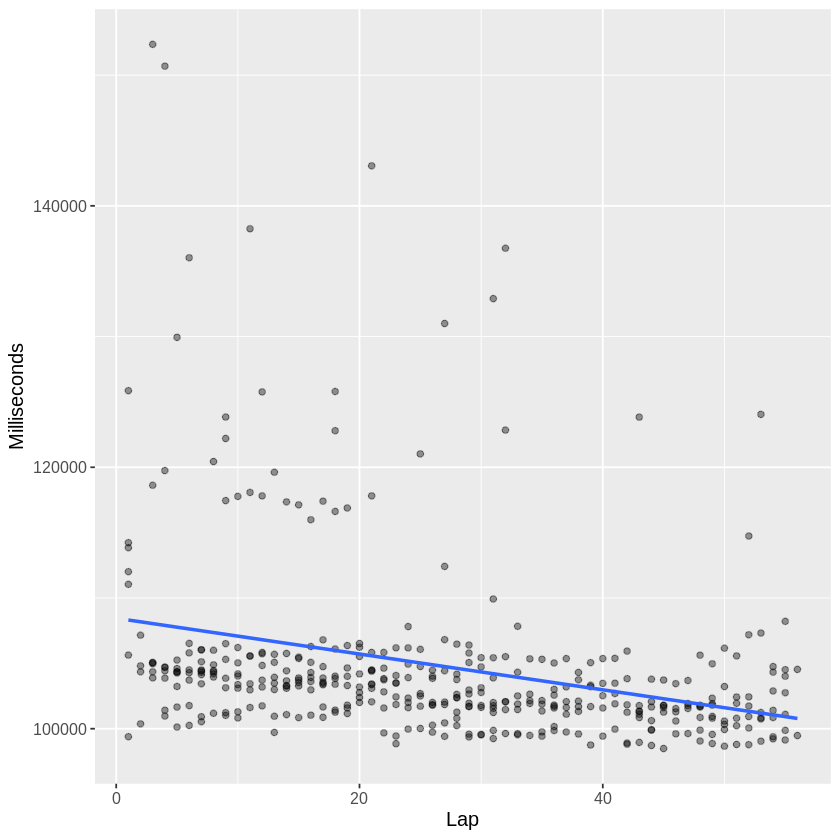

In [49]:
#19. USA, Austin

zg_austin <- romeo_lap %>%
                filter(raceId %in% austin_race_ID) 

zg_austin_clean <- zg_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_austin_clean
zg_austin_clean_ID <- zg_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_austin_races <- romeo_lap %>%
                    filter(raceId %in% zg_austin_clean_ID)

formulaone_split <- initial_split(zg_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

## GETS PREDICTION

get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



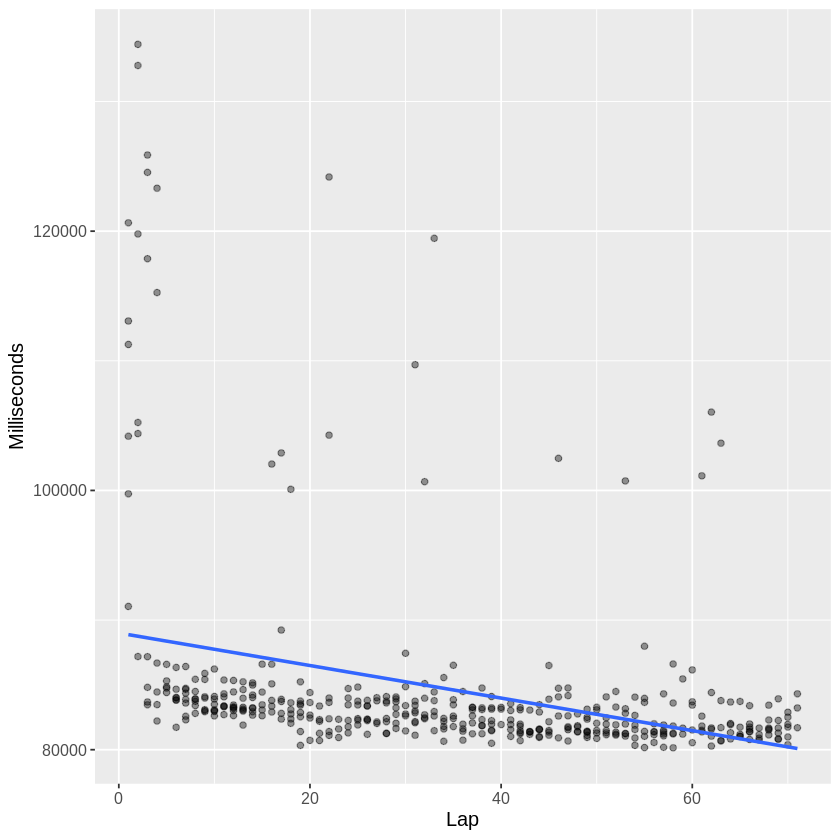

In [50]:
#20. Mexico

zg_mexico <- romeo_lap %>%
                filter(raceId %in% mexico_race_ID) 

zg_mexico_clean <- zg_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

zg_mexico_clean_ID <- zg_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_mexico_races <- romeo_lap %>%
                    filter(raceId %in% zg_mexico_clean_ID)

formulaone_split <- initial_split(zg_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

## GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1029,212
16,142
52,142
70,142
35,141
1071,140
87,71
107,71
917,71


`geom_smooth()` using formula 'y ~ x'



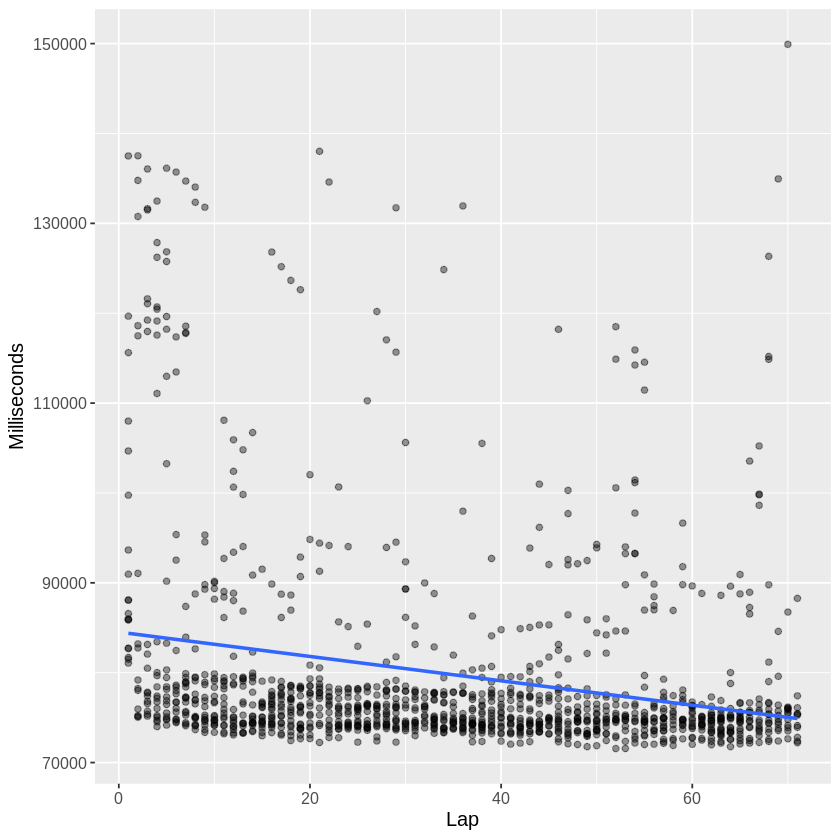

In [51]:
#21. Brazil

zg_brazil <- romeo_lap %>%
                filter(raceId %in% brazil_race_ID) 

zg_brazil_clean <- zg_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
zg_brazil_clean
zg_brazil_clean_ID <- zg_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_brazil_races <- romeo_lap %>%
                    filter(raceId %in% zg_brazil_clean_ID)

formulaone_split <- initial_split(zg_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

## GETS PREDICTION

get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1030,161
17,110
1047,108
355,55
877,55
918,55
945,55
968,55
988,55


`geom_smooth()` using formula 'y ~ x'



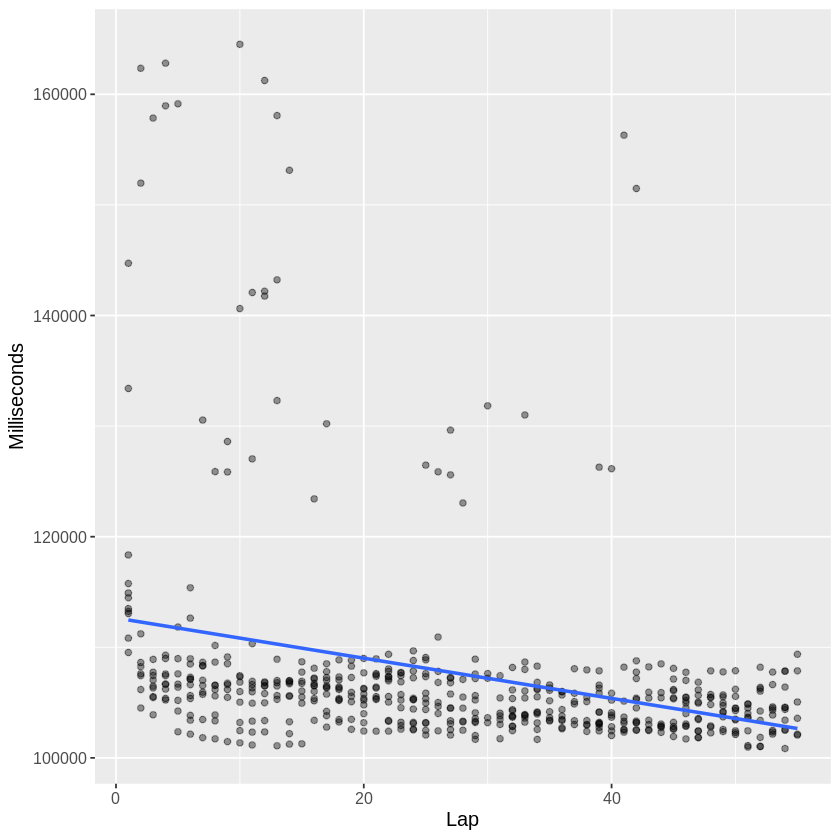

In [52]:
#22. Abu Dhabi

zg_uae <- romeo_lap %>%
                filter(raceId %in% uae_race_ID) 

zg_uae_clean <- zg_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
zg_uae_clean
zg_uae_clean_ID <- zg_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

zg_uae_races <- romeo_lap %>%
                    filter(raceId %in% zg_uae_clean_ID)

formulaone_split <- initial_split(zg_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

## GETS PREDICTION

get_uae_prediction()

## Collection

In [53]:
rmse_col
racetime_col

# write_csv(rmse_col, "zg_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,98661.272,1
rmse,standard,8574.668,2
rmse,standard,16510.477,3
rmse,standard,14017.370,4
rmse,standard,8528.149,5
rmse,standard,10784.615,6
rmse,standard,11572.940,7
rmse,standard,16438.286,8
rmse,standard,8855.880,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5734268,95.57113,1.592852,1
5584816,93.08027,1.551338,2
5592210,93.20350,1.553392,3
5526199,92.10332,1.535055,4
5325470,88.75783,1.479297,5
5779986,96.33310,1.605552,6
6781046,113.01744,1.883624,7
6133159,102.21931,1.703655,8
5662453,94.37422,1.572904,9
